# Language Modelling

The Natural Language Toolkit has data types and functions that make life easier for us when we want to count bigrams and compute their probabilities.

In [30]:
# Needed imports
import nltk
%matplotlib notebook


**Import the Brown corpus**

The Brown University Standard Corpus of Present-Day American Englis, or just Brown Corpus (https://en.wikipedia.org/wiki/Brown_Corpus),  is a general corpus containing 500 samples of English-language text, totaling roughly one million words, compiled from works published in the United States in 1961.



In [2]:
from nltk.corpus import brown
brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

We can access the words of the Brown corpus, either all of them of those belonging to any of its categories.

In [3]:
print(brown.words())
print(brown.words(categories='mystery'))

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]
[u'There', u'were', u'thirty-eight', u'patients', ...]


C:\Users\Public\Anaconda2\lib\site-packages\unidecode\__init__.py:46: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  _warn_if_not_unicode(string)


We compute the word frequency by using the `FreqDist` function of NLTK (an nltk.FreqDist() is like a dictionary, but it is ordered by frequency).

The following uses this function to compute the freqs and plot the 20 most frequent words

## 1. Frequency Distribution

In [4]:
freq_brown = nltk.FreqDist(brown.words())

list(freq_brown.keys())[:20]
freq_brown.most_common(20)

[(u'the', 62713),
 (u',', 58334),
 (u'.', 49346),
 (u'of', 36080),
 (u'and', 27915),
 (u'to', 25732),
 (u'a', 21881),
 (u'in', 19536),
 (u'that', 10237),
 (u'is', 10011),
 (u'was', 9777),
 (u'for', 8841),
 (u'``', 8837),
 (u"''", 8789),
 (u'The', 7258),
 (u'with', 7012),
 (u'it', 6723),
 (u'as', 6706),
 (u'he', 6566),
 (u'his', 6466)]

We can draw the frequency distribution by plotting it

<IPython.core.display.Javascript object>


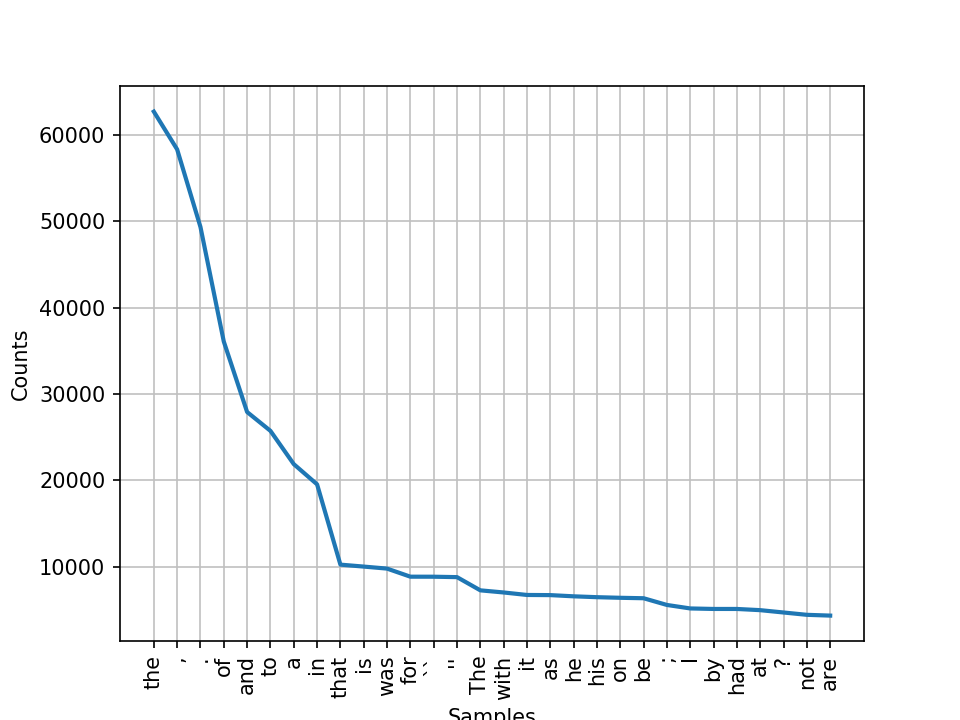

In [35]:
freq_brown.plot(30)

We can see that they are mostly stopwords and punctuation signs.

From NLTK we can access a list of stowords from different languages. This is helpful if we want to remove them.

In [6]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'eac

**But should we remove them? Why?** 

No, just think in what we are trying to do here. We are trying to use the dataset to create a model of the language to, given a set of words, predict the most probable next word. For this process, stopwords, as well as punctuation or other signs are need.

For the same reason, we shall not stemmize/lemmatize, neither normalize the words. We need all these variations to learn a proper language model (i.e, `the` != `The`)

As we will discuss in the comming lessons, both stemming and stopwords removal could be useful in other tasks such Text Classification.

## 2. Bigram Model

We'll start small and we will create a language model based on bi-grams. To that end, we will use the `ConditionalFreqDist` function of NLTK. `nltk.ConditionalFreqDist()` counts frequencies of pairs. When given a list of bigrams, it maps each first word of a bigram to a FreqDist over the second words of the bigram.

If you remember the theoretical session, we are applying the Markov assumption: the next element (word in our case) of a sequence can be predicted by just focusing on the previous one.

The following code creates these bi-gram counts.
If we pring the `conditions` we can see the antecedent of the bi-grams. (`conditions()` in a `ConditionalFreqDist` are like `keys()` in a dictionary).

In [7]:
cfreq_brown_2gram = nltk.ConditionalFreqDist(nltk.bigrams(brown.words()))

cfreq_brown_2gram.conditions()[:20]

[u'fawn',
 u'Ranavan',
 u'belligerence',
 u'gai',
 u'mid-week',
 u'1,800',
 u'deferment',
 u'Debts',
 u'Poetry',
 u'woods',
 u'clotted',
 u'hanging',
 u'Torquemada',
 u'comically',
 u'localized',
 u'spidery',
 u'disobeying',
 u'over/under',
 u'mutters',
 u'Adjusting']

Let' see the most frequent terms after the word `my`.

In [8]:
# the cfreq_brown_2gram entry for "my" is a FreqDist (i.e, a dictionary of word and freqCount).
my_terms = cfreq_brown_2gram["my"]

# Sort (desc) the terms by frequency and print the 25th most common
sorted(my_terms.items(), key=lambda x: -x[1])[:25]

[(u'own', 52),
 (u'life', 19),
 (u'hand', 19),
 (u'mind', 19),
 (u'first', 15),
 (u'hands', 14),
 (u'wife', 14),
 (u'father', 13),
 (u'eyes', 13),
 (u'way', 12),
 (u'husband', 12),
 (u'mother', 12),
 (u'head', 11),
 (u'left', 8),
 (u'body', 7),
 (u'heart', 7),
 (u'Uncle', 7),
 (u'point', 7),
 (u'brother', 6),
 (u'family', 6),
 (u'name', 6),
 (u'best', 6),
 (u'right', 6),
 (u'business', 6),
 (u'friends', 6)]

We can do the same with the `most_common` function

In [9]:
cfreq_brown_2gram["my"].most_common(25)

[(u'own', 52),
 (u'life', 19),
 (u'hand', 19),
 (u'mind', 19),
 (u'first', 15),
 (u'hands', 14),
 (u'wife', 14),
 (u'father', 13),
 (u'eyes', 13),
 (u'way', 12),
 (u'husband', 12),
 (u'mother', 12),
 (u'head', 11),
 (u'left', 8),
 (u'body', 7),
 (u'heart', 7),
 (u'Uncle', 7),
 (u'point', 7),
 (u'brother', 6),
 (u'family', 6),
 (u'name', 6),
 (u'best', 6),
 (u'right', 6),
 (u'business', 6),
 (u'friends', 6)]

With the `nltk.ConditionalProbDist()`, map pairs are mapped to probabilities, instead of counts.

In [10]:
cprob_brown_2gram = nltk.ConditionalProbDist(cfreq_brown_2gram, nltk.MLEProbDist) # Uses a Maximum Likelihood Estimation (MLE) estimator

This again has `conditions()` wihch are like dictionary keys

In [11]:
cprob_brown_2gram.conditions()

[u'fawn',
 u'Ranavan',
 u'Academicianship',
 u'mid-week',
 u'1,800',
 u'deferment',
 u'Debts',
 u'Poetry',
 u'woods',
 u'clotted',
 u'hanging',
 u'Torquemada',
 u'comically',
 u'localized',
 u'spidery',
 u'disobeying',
 u'over/under',
 u'Adjusting',
 u'$25-a-plate',
 u'originality',
 u'Hydro-Electric',
 u'all-county',
 u'halfways',
 u'mutinies',
 u'Western',
 u'alphabetic',
 u'Gravesend',
 u'Duhagon',
 u'familiarness',
 u'Elec',
 u'slothful',
 u'co-operation',
 u'Valle',
 u'Famed',
 u'differently',
 u'stipulate',
 u'pigment',
 u'appropriation',
 u'rawhide',
 u"hangin'",
 u'strictest',
 u'gay-ess',
 u'bringing',
 u'wooded',
 u'liaisons',
 u'broiler',
 u'wooden',
 u'Pergamon',
 u'Loeb',
 u'Sack',
 u'happenings',
 u'broiled',
 u'Macropathological',
 u'circuitry',
 u'deferments',
 u'ultra-violet',
 u'S-D',
 u'seven-',
 u'non-violent',
 u"Hammarskjold's",
 u'27%',
 u'gaskets',
 u'intonaco',
 u'scrapes',
 u'precocity',
 u'Shocked',
 u'feasibility',
 u'271',
 u'deadheads',
 u'273',
 u'275',
 

We can also find the words that can come after `my` by using the function `samples()`

In [12]:
cprob_brown_2gram["my"].samples()

[u'neighbors',
 u'pardon',
 u'lack',
 u'focus',
 u'psyche',
 u'talks',
 u'chair',
 u'captain',
 u'religious',
 u'children',
 u'extra',
 u'supposedly',
 u'father',
 u'teaching',
 u'dislike',
 u'plants',
 u'woman',
 u'street',
 u'garden',
 u'very',
 u'knife',
 u'seedbed',
 u'diary',
 u'drinking',
 u'continued',
 u'roving',
 u"daughter's",
 u'school',
 u'induction',
 u'list',
 u'brother',
 u'leave',
 u'flashy',
 u'kit',
 u'small',
 u'clothes',
 u'spiritual',
 u'past',
 u'second',
 u'invention',
 u'275',
 u'lawyer',
 u'pass',
 u'investment',
 u'conscience',
 u'plays',
 u'paintings',
 u'Anthropology',
 u'fingers',
 u'Johnnie',
 u'attitudes',
 u'new',
 u'learned',
 u'body',
 u'full',
 u'itinerary',
 u'leg',
 u'honour',
 u'doing',
 u'men',
 u'sins',
 u'studio',
 u'others',
 u'change',
 u'fantasies',
 u'boy',
 u'remark',
 u'property',
 u'daughter',
 u'teeth',
 u'conviction',
 u'study',
 u'studied',
 u'experience',
 u'trial',
 u'products',
 u'derby',
 u'opinion',
 u'salvation',
 u'honor',
 u'lo

In addition, you can see the prob of a particular pair

In [13]:
cprob_brown_2gram["my"].prob("own")

0.04478897502153316

In [14]:
cprob_brown_2gram["my"].prob("leg")

0.0034453057708871662

## 3. Compute the probability of a sentence

Create a function to compute the probability of a word from its frequency

In [15]:
def unigram_prob(word):
    len_brown = len(brown.words())
    return float(freq_brown[word]) / float(len_brown)

unigram_prob("night")

0.0003427512418273636

We now can ask for the probability of a word sequence.

For instance: `P(how do you do) = P(how) * P(do|how) * P(you|do) * P(do | you)`

In [16]:
unigram_prob("how") * cprob_brown_2gram["how"].prob("do") * cprob_brown_2gram["do"].prob("you") * cprob_brown_2gram["you"].prob("do")

1.5639033871961e-09

Compare it with the prob of another not so common sentence: `how do you dance`

In [17]:
unigram_prob("how") * cprob_brown_2gram["how"].prob("do") * cprob_brown_2gram["do"].prob("you") * cprob_brown_2gram["you"].prob("dance")

1.0089699272232904e-10

As expected, one order of magnitude less probable

## 4. Generate Language

With our bi-gram language model already generated, we can now use it to generate text and see what has our model learned.

In [18]:
cprob_brown_2gram["my"].generate()

u'friend'

Let's see if the model create valid text or just jiberish

In [19]:
word = "my"
text = ""
for index in range(20):
    text += word + " "
    word = cprob_brown_2gram[ word].generate()
print(text)

my burning arcs which is bounded up in a line of him in her back of a Democratic duties normally 


It is not a valid sentence, but it has some kind of sense. 

Remember that we are just learning from bigrams!

**We can try another datasets to train a language models using different dataset.**

In particular we are going to import the book dataset of NLTK, which includes the text of different books.


The following function takes a text (i.e., the text o a given book) to learn a language model, and a initial word to start the generation and the number of words that have to be generated.

In [20]:
# Here is how to do this with NLTK books:
from nltk.book import *

def generate_text(text, initialword, numwords):
    bigrams = list(nltk.ngrams(text, 2))
    cpd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(bigrams), nltk.MLEProbDist)

    word = initialword
    text = ""
    for i in range(numwords):
        text += word + " "
        word = cpd[ word].generate() 

    print(text)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


We use different books to generate text

In [21]:
# Holy Grail
generate_text(text6, "I", 25)


I ' s not right , sir . LAUNCELOT : It ' re doctors ?! You are you ' s not risk another shrubbery , 


In [22]:
# sense and sensibility
generate_text(text2, "I", 25)

I can it had passed it all , with my exchange , on remaining half so important Tuesday came only be sure you know where 


# 5. TriGrams

Let's try a more advance model using tri-grams to see if it is able to generate better language.

We cannot use the `ConditionalFreqDist` as before. `nltk.ConditionalFreqDist` expects its data as a sequence of `(condition, item)` tuples. `nltk.trigrams` returns tuples of length 3. Therefore, we have to adapt the trigrams output.

In [23]:
def generate_text(text, initialword, numwords):
    trigrams = list(nltk.ngrams(text, 3,  pad_right=True, pad_left=True))
    trigram_pairs = (((w0, w1), w2) for w0, w1, w2 in trigrams)
    cpd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigram_pairs), nltk.MLEProbDist)

    word = initialword
    text = ""
    for i in range(numwords):
        w = cpd[(word[i],word[i+1])].generate() 
        word += [w]
    
    print(" ".join(word))

In [24]:
generate_text(text2, ["I", "am"], 25)

I am afraid , Miss Dashwood was above with her increase of emotion , her eyes were red and swollen ; and without selfishness -- without encouraging


As expected, it creates a better LM.

Can we go on with more n-grams? Let's see

# 6. N-grams

In [25]:
def generate_text(text, initialword, numwords):
    ngrams = list(nltk.ngrams(text, 4,  pad_right=True, pad_left=True))
    ngram_pairs = (((w0, w1, w2), w3) for w0, w1, w2, w3 in ngrams)
    cpd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(ngram_pairs), nltk.MLEProbDist)

    word = initialword
    text = ""
    for i in range(numwords):
        w = cpd[(word[i],word[i+1], word[i+2])].generate() 
        word += [w]
    
    print(" ".join(word))

In [26]:
generate_text(text2, ["I", "am", "very"], 25)

I am very sure that Colonel Brandon would give me a living ." " No ," answered Elinor , without knowing what she said . I have many


As we make the n-grams larger we got more accurate language models. However, if we create large n-grams we are not going to have enough data to train our models: we will never see enough data (enough sequences of n-grams) to train the model

# 7. Star Wars

Let's try to generate some text based on the dialogues from the Star Wars scripts (episodes IV,V, and VI).

All the information for this exercise was retrieved from the [Visualizing Star Wars Movie Scripts](https://github.com/gastonstat/StarWars) project.

We start by reading all the dialogue lines from the scripts, which are labeled with the character speaking. We are only considering Luke, Leia, Han Solo and Vader. We left Chewbacca out of the example for obvious reasons...

We read all the lines of each character and combine them in one single string. We tokenize this string using the `WordPunctTokenizer` and use these tokens to create an NLTK Text object.

__NOTE__: some warnings may appear when executing this part (something like *Skipping line...*), due to some minor parsing errors when generating the dataframe. You can ignore them.

In [27]:
import nltk
from nltk import word_tokenize, WordPunctTokenizer
import pandas

wpt = WordPunctTokenizer()

c3po_string = ""
vader_string = ""
solo_string = ""
luke_string = ""
leia_string = ""

def read_lines(path):
    lines = pandas.read_csv(path, delim_whitespace=True, error_bad_lines=False)
    
    solo_lines = lines.loc[lines['Char'] == 'HAN']['Text']
    vader_lines = lines.loc[lines['Char'] == 'VADER']['Text']
    luke_lines = lines.loc[lines['Char'] == 'LUKE']['Text']
    leia_lines = lines.loc[lines['Char'] == 'LEIA']['Text']
    
    
    global vader_string, c3po_string, solo_string, luke_string, leia_string
    solo_string = solo_string + " " + " ".join(solo_lines)
    vader_string = vader_string + " " + " ".join(vader_lines)
    luke_string = luke_string + " " + " ".join(luke_lines)
    leia_string = leia_string + " " + " ".join(leia_lines)
    
read_lines('files/SW_EpisodeIV.txt')
read_lines('files/SW_EpisodeV.txt')
read_lines('files/SW_EpisodeVI.txt')

solo_text = nltk.Text(wpt.tokenize(solo_string))
vader_text = nltk.Text(wpt.tokenize(vader_string))
luke_text = nltk.Text(wpt.tokenize(luke_string))
leia_text = nltk.Text(wpt.tokenize(leia_string))

Skipping line 555: expected 3 fields, saw 9

Skipping line 54: expected 3 fields, saw 4

Skipping line 191: expected 3 fields, saw 4
Skipping line 285: expected 3 fields, saw 10



Using these Text objects, we can proceed in the same way as in the previous examples, to generate texts. 

The following `generate_text_backoff` tries to generate a new word based on an 4-gram proabability. If this fails, it tries the Tri-gram one and then the Bi-gram. If none of them are sucessful, it just stops. Recalling from the POS tagging session, this is known as a backoff strategy.

This function takes as parameter some training text, an initial words to start the sentence, and the length of the text to be generated.

In [28]:
def generate_text_backoff(text, initialwords, numwords):
   
    #ngrams
    ngrams = list(nltk.ngrams(text, 4,  pad_right=True, pad_left=True))
    ngram_pairs = (((w0, w1, w2), w3) for w0, w1, w2, w3 in ngrams)
    cpdNgram = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(ngram_pairs), nltk.MLEProbDist)

    #trigram 
    trigrams = list(nltk.ngrams(text, 3,  pad_right=True, pad_left=True))
    trigram_pairs = (((w0, w1), w2) for w0, w1, w2 in trigrams)
    cpd3gram = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigram_pairs), nltk.MLEProbDist)

    #bigram
    bigrams = list(nltk.ngrams(text, 2))
    cpd2gram = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(bigrams), nltk.MLEProbDist)
    
    
    word = initialwords
    for i in range(numwords):
        #try n-gram
        if (word[i],word[i+1], word[i+2]) in cpdNgram:
            w = cpdNgram[(word[i],word[i+1], word[i+2])].generate()#.max()
        #try 3-gram
        elif (word[i+1],word[i+2]) in cpd3gram:
            w = cpd3gram[(word[i+1],word[i+2])].generate()#.max()
        #try 2-gram
        elif word[i+2] in cpd2gram:
            w = cpd2gram[word[i+2]].generate().#max()
        #at least we tried...
        else:
            break
            
        word += [w]
    
    return " ".join(word)

SyntaxError: invalid syntax (<ipython-input-28-f026fff6c5e5>, line 28)

Now that we have our function ready, let's try to generate some texts and check how they vary from one character to another, using by the different starting tuples.

In [ ]:
print("Han Solo: " + generate_text_backoff(solo_text, ["Chewie", "come", "here"], 25) + "\n")
print("Leia: " + generate_text_backoff(leia_text, ["My", "name", "is"], 25) + "\n")
print("Luke: " + generate_text_backoff(luke_text, ["It", "sure", "is"], 25) + "\n")
print("Vader: " + generate_text_backoff(vader_text, ["It", "sure", "is"], 25) + "\n")

In [ ]:
print("Vader: " + generate_text_backoff(vader_text, ["I", "am", "your"], 25) + "\n")